# Code Breaking Part 1: Ceaser's Cipher

Ceaser's Cipher is a cipher used to code messages by shifting the alphabet by a certain number of letters (Ceaser's Cipher shifts by mulitply of threes) 

Resources: The Code Book, and this video https://www.youtube.com/watch?v=LhS8N6oJdno

See also: http://practicalcryptography.com/ciphers/classical-era/caesar/ and http://practicalcryptography.com/cryptanalysis/stochastic-searching/cryptanalysis-caesar-cipher/

In [4]:
from Resources.Functions import *

## Step 1) Encrypt the message

### Step 1.1) Build the plain alphabet and the cipher alphabet

In [3]:
plainAlphabet = list('abcdefghijklmnopqrstuvwxyz')

shift = 3 # Negative is a rotation to the right, positive is a rotation to the left
cipherAlphabet = list(np.roll(plainAlphabet,-3))
    
for i in range(len(plainAlphabet)):
    print(plainAlphabet[i], cipherAlphabet[i])

a d
b e
c f
d g
e h
f i
g j
h k
i l
j m
k n
l o
m p
n q
o r
p s
q t
r u
s v
t w
u x
v y
w z
x a
y b
z c


### Step 1.2)  Build the cipher key

I take into consideration both upper and lower cases
(This is optional)

In [4]:
key = {}
for i in range(len(plainAlphabet)):
    key[plainAlphabet[i].lower()] = cipherAlphabet[i].lower()
    key[plainAlphabet[i].upper()] = cipherAlphabet[i].upper()
key

{'a': 'd',
 'A': 'D',
 'b': 'e',
 'B': 'E',
 'c': 'f',
 'C': 'F',
 'd': 'g',
 'D': 'G',
 'e': 'h',
 'E': 'H',
 'f': 'i',
 'F': 'I',
 'g': 'j',
 'G': 'J',
 'h': 'k',
 'H': 'K',
 'i': 'l',
 'I': 'L',
 'j': 'm',
 'J': 'M',
 'k': 'n',
 'K': 'N',
 'l': 'o',
 'L': 'O',
 'm': 'p',
 'M': 'P',
 'n': 'q',
 'N': 'Q',
 'o': 'r',
 'O': 'R',
 'p': 's',
 'P': 'S',
 'q': 't',
 'Q': 'T',
 'r': 'u',
 'R': 'U',
 's': 'v',
 'S': 'V',
 't': 'w',
 'T': 'W',
 'u': 'x',
 'U': 'X',
 'v': 'y',
 'V': 'Y',
 'w': 'z',
 'W': 'Z',
 'x': 'a',
 'X': 'A',
 'y': 'b',
 'Y': 'B',
 'z': 'c',
 'Z': 'C'}

### Step 1.3) Transfer the plain text to the cipher text 

In [5]:
plainText = list('Hello World')
cipherText = ''

for plainCharacter in plainText:
    
    # We will translate all letters from the plain alphabet into the cipher alphabet
    if plainCharacter.isalpha():  
        cipherCharacter = key[plainCharacter]
        cipherText = cipherText + cipherCharacter
        
    # All other characters will just be copied over
    else:
        cipherText = cipherText + plainCharacter
        
print(cipherText)

Khoor Zruog


### Step 1.4) Put it together
I am now going to compile the above steps into a function

In [6]:
def Incrypt_CeaserShiftCipher(plainText, plainAlphabet, shift):

    cipherAlphabet = list(np.roll(plainAlphabet,shift))
    
    key = {}
    for i in range(len(plainAlphabet)):
        key[plainAlphabet[i].lower()] = cipherAlphabet[i].lower()
        key[plainAlphabet[i].upper()] = cipherAlphabet[i].upper()
        
    cipherText = ''

    for plainCharacter in plainText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if plainCharacter.isalpha():  
            cipherCharacter = key[plainCharacter]
            cipherText = cipherText + cipherCharacter

        # All other characters will just be copied over
        else:
            cipherText = cipherText + plainCharacter
    
    return cipherText
    

In [347]:
Incrypt_CeaserShiftCipher('ATTACK THE DOG AT DAWN',plainAlphabet,-3)

'DWWDFN WKH GRJ DW GDZQ'

## Step 2) De-encrypt the cipher text

Here we will assume that we know the key and encryption method.
We essentially repeat the steps of encrypting the text but in reverse

In [5]:
def Decrypt_CeaserShiftCipher(cipherText, plainAlphabet, shift):

    cipherAlphabet = list(np.roll(plainAlphabet,shift))
    
    key = {}
    for i in range(len(plainAlphabet)):
        key[cipherAlphabet[i].lower()] = plainAlphabet[i].lower()
        key[cipherAlphabet[i].upper()] = plainAlphabet[i].upper()
        
    plainText = ''

    for cipherCharacter in cipherText:

        # We will translate all letters from the plain alphabet into the cipher alphabet
        if cipherCharacter.isalpha():  
            plainCharacter = key[cipherCharacter]
            plainText = plainText + plainCharacter

        # All other characters will just be copied over
        else:
            plainText = plainText + cipherCharacter
    
    return plainText
    

In [6]:
cipherText = open('NationalCipherChallenge2021/Challenge1A.txt').read()
prepareText(cipherText)

'GZQQXHZLANQDCZMCHZLQDZKKXMNSRTQDVGXHGZUDADDMDWHKDCSNSGDZQBGZDNKNFHRSRCHCHCNRNLDSGHMFSNTORDSRNLDNMDHZLQDZKKXQDZKKXGNOHMFSGZSNTQNUDQKNQCRVHKKEHMCRNLDSGHMFZAHSLNQDQDKDUZMSENQLDSNSZBJKDRNNMSGDFQNTOGDQDHRFQDZSATSHSEDDKRKHJDSGDQDHRZCHLHMHRGHMFQDSTQMNMAQDZJHMFVVHHBHOGDQRRDUDMSXRHWXDZQRNMZMCDUDMSGDBNKCVZQEHZKJZHMSDQBDOSOHKDCNDRMSRDDLSNADFHUHMFLTBGAZBJHEXNTCNMSGZUDZMXSGHMFENQLDSNVNQJNMSGDMLZXADXNTBNTKCRDMCNUDQRNLDMDVAHDRENQLDSNSQZHMTOVDQDBDHUDCZRSZBJNELZSDQHZKEQNLKNMCNMZBNTOKDNEVDDJRZFNSGZSLHFGSLZJDZFNNCDWDQBHRDENQSGDLZMCVGHKDSGDEHQRSEDVSDWSRZQDQDKZSHUDKXRHLOKDHSVNTKCADZFNNCDWDQBHRDENQXNTMFZMZKXRSRSNSQXSNVNQJNTSVGZSSGDXZQDSDKKHMFTRHGZUDZSSZBGDCSGDEHQRSHSDLEQNLSGDAZSBGRNXNTBZMRDDVGZSHLDZMHVNTKCUDQXCDZQKXKHJDSNJMNVVGZSSGDFQDZSLZSSDQQDEDQRSNZMCHRTRODBSXNTVHKKVZMSSNJMNVSNNSGDQDBQTHSRCNMSMDDCSNJMNVLTBGSNAQDZJSGHRNMDHESGDXGZUDCNMDNTQHMCTBSHNMSQZHMHMFNMAZRHBBHOGDQRSGDXRGNTKCADEHMDLXBNKKDZFTDRGDQDGZUDMHBJMZLDCSGHREHKDSGDKHFGSGNTRDBNMROHQZBXADBZTRDNEVGDQDSGDOZODQRVDQDENTMCSGZSLZJDRHSRNTMCZKNSLNQDHLOQDR

In [8]:
Decrypt_CeaserShiftCipher(prepareText(cipherText),englishAlphabet,-3)

'DWNNUEWIXKNAZWJZEWINAWHHUJKPOQNASDUEDWRAXAAJATEHAZPKPDAWNYDWAKHKCEOPOZEZEZKOKIAPDEJCPKQLOAPOKIAKJAEWINAWHHUNAWHHUDKLEJCPDWPKQNKRANHKNZOSEHHBEJZOKIAPDEJCWXEPIKNANAHARWJPBKNIAPKPWYGHAOKKJPDACNKQLDANAEOCNAWPXQPEPBAAHOHEGAPDANAEOWZEIEJEODEJCNAPQNJKJXNAWGEJCSSEEYELDANOOARAJPUOETUAWNOKJWJZARAJPDAYKHZSWNBEWHGWEJPANYALPLEHAZKAOJPOAAIPKXACEREJCIQYDXWYGEBUKQZKJPDWRAWJUPDEJCBKNIAPKSKNGKJPDAJIWUXAUKQYKQHZOAJZKRANOKIAJASXEAOBKNIAPKPNWEJQLSANAYAERAZWOPWYGKBIWPANEWHBNKIHKJZKJWYKQLHAKBSAAGOWCKPDWPIECDPIWGAWCKKZATANYEOABKNPDAIWJZSDEHAPDABENOPBASPATPOWNANAHWPERAHUOEILHAEPSKQHZXAWCKKZATANYEOABKNUKQJCWJWHUOPOPKPNUPKSKNGKQPSDWPPDAUWNAPAHHEJCQOEDWRAWPPWYDAZPDABENOPEPAIBNKIPDAXWPYDOKUKQYWJOAASDWPEIAWJESKQHZRANUZAWNHUHEGAPKGJKSSDWPPDACNAWPIWPPANNABANOPKWJZEOQOLAYPUKQSEHHSWJPPKGJKSPKKPDANAYNQEPOZKJPJAAZPKGJKSIQYDPKXNAWGPDEOKJAEBPDAUDWRAZKJAKQNEJZQYPEKJPNWEJEJCKJXWOEYYELDANOPDAUODKQHZXABEJAIUYKHHAWCQAODANADWRAJEYGJWIAZPDEOBEHAPDAHECDPDKQOAYKJOLENWYUXAYWQOAKBSDANAPDALWLANOSANABKQJZPDWPIWGAOEPOKQJZWHKPIKNAEILNAO

## Test the code

Now test that the encryt and decrypt functions work correctly.

In [354]:
shift = 3
startText = 'Expect ambush from dogs tonight. Do not trust agent black.'

incryptedText = Incrypt_CeaserShiftCipher(startText,plainAlphabet,shift)
print(incryptedText)

decryptedText = Decrypt_CeaserShiftCipher(incryptedText,plainAlphabet,shift)
print(decryptedText)

Bumbzq xjyrpe colj aldp qlkfdeq. Al klq qorpq xdbkq yixzh.
Expect ambush from dogs tonight. Do not trust agent black.


## Step 3)  Let's try to break the encryption (pretend we do not know the shift/key)

### Frequency Analysis

Text will typically follow a praticular trend where each letter appears with a certain frquency. 
We can make use of this fact to solve Ceaser's Cipher by finding the frequency of each character in the cipher text and comparing that frequency trend to the known frequency trend of english

#### Frequency Analysis Part 1: Single Letter Frequencies

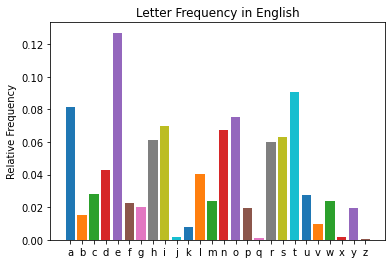

In [8]:
letterFrequencies_English = {'a':0.08167, 'b':0.01492, 'c':0.02782, 'd':0.04253, 'e':0.12702, 'f':0.02228, 'g':0.02015, 
                     'h':0.06094, 'i':0.06966, 'j':0.00153, 'k':0.00772, 'l':0.04025, 'm':0.02406, 'n':0.06749, 
                     'o':0.07507, 'p':0.01929, 'q':0.00095, 'r':0.05987, 's':0.06327, 't':0.09056, 'u':0.02758, 
                     'v':0.00978, 'w':0.02360, 'x':0.00150, 'y':0.01974, 'z':0.00074}

for i,key in enumerate(letterFrequencies_English):
    bar = plt.bar(i,letterFrequencies_English[key])
xticks = plt.xticks(np.arange(len(plainAlphabet)),plainAlphabet)
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Letter Frequency in English')

##### An aside - arbitrary language single letter frequency analsysis

Say that we wish to decode a message in a language other than English. To do this via a frequency analysis, we are going to need the letter / symbol frequencies of that language.  

Here is a short block of code to find the letter frequencies of a given text.  

- First, you must find a sample text in the given language.  The longer the sample text the better.  Here I removed all punctuation from the sample text. 
- Next I go through each character in the sample text (assuming that whitespace are not letters in this language)


In [9]:
def letterFrequencies( sampleText ):
    letterFrequencies_arbitraryLanguage = {}
    length_sampleText = 0

    for character in list(sampleText):

        if character.isspace() == False:
            length_sampleText = length_sampleText + 1

            if character.isalpha() == True:
                character = character.lower()

                if character in letterFrequencies_arbitraryLanguage.keys():
                    letterFrequencies_arbitraryLanguage[character] = letterFrequencies_arbitraryLanguage[character] + 1 
                else:
                     letterFrequencies_arbitraryLanguage[character] = 1

            else:
                if character in letterFrequencies_arbitraryLanguage.keys():
                    letterFrequencies_arbitraryLanguage[character] = letterFrequencies_arbitraryLanguage[character] + 1 
                else:
                     letterFrequencies_arbitraryLanguage[character] = 1

    for symbol in letterFrequencies_arbitraryLanguage.keys():
        letterFrequencies_arbitraryLanguage[symbol] = letterFrequencies_arbitraryLanguage[symbol]/length_sampleText

    return letterFrequencies_arbitraryLanguage

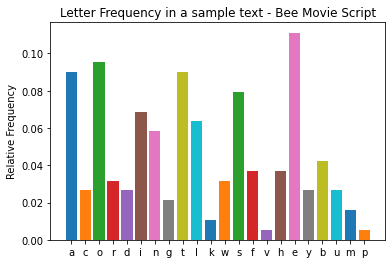

In [135]:
sampleText = "According to all known laws of aviation there is no way a bee should be able to fly Its wings are too small to get its fat little body off the ground The bee of course flies anyway because bees dont care what humans think is impossible"

letterFrequencies_sampleText = letterFrequencies(sampleText)

for i,key in enumerate(letterFrequencies_sampleText):
    bar = plt.bar(i,letterFrequencies_sampleText[key])

xticks = plt.xticks(np.arange(len(letterFrequencies_sampleText.keys())),letterFrequencies_sampleText.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Letter Frequency in a sample text - Bee Movie Script')

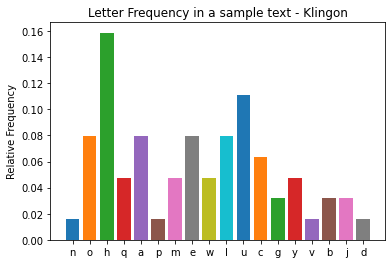

In [133]:
sampleText = "noH QapmeH wo Qawluchugh yay chavbelu ej wo choqmeH may DoHluchugh lujbelu"

letterFrequencies_sampleText = letterFrequencies(sampleText)

for i,key in enumerate(letterFrequencies_sampleText):
    bar = plt.bar(i,letterFrequencies_sampleText[key])
    
xticks = plt.xticks(np.arange(len(letterFrequencies_sampleText.keys())),letterFrequencies_sampleText.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Letter Frequency in a sample text - Klingon')

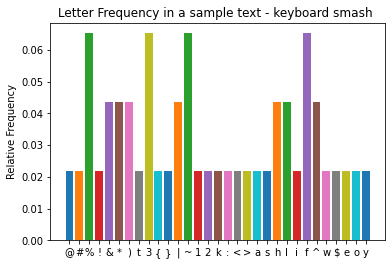

In [134]:
sampleText = "@#%! &*)T%33 *&){}|| ~~~123 K: <> ashlif ^%^W$Fhlefoy"

letterFrequencies_sampleText = letterFrequencies(sampleText)

for i,key in enumerate(letterFrequencies_sampleText):
    bar = plt.bar(i,letterFrequencies_sampleText[key])
    
xticks = plt.xticks(np.arange(len(letterFrequencies_sampleText.keys())),letterFrequencies_sampleText.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Letter Frequency in a sample text - keyboard smash ')

##### Single Letter Frequencies in the Cipher Text

Now we must find the frequency of each character in the cipher text.  For this we will not consider the case of the character 

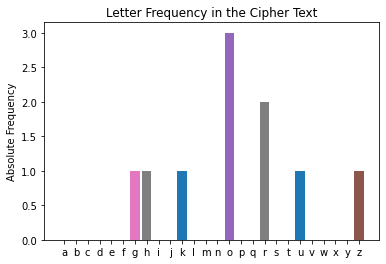

In [84]:
letterFrequencies_cipherText = {}
for plainCharacter in plainAlphabet:
    cntr = 0
    for cipherCharacter in list(cipherText):
        if cipherCharacter.lower() == plainCharacter:
            cntr = cntr + 1
    letterFrequencies_cipherText[plainCharacter] = cntr

for i,key in enumerate(letterFrequencies_cipherText):
    bar = plt.bar(i,letterFrequencies_cipherText[key])
xticks = plt.xticks(np.arange(len(plainAlphabet)),plainAlphabet)
ylabel = plt.ylabel('Absolute Frequency')
title = plt.title('Letter Frequency in the Cipher Text')

##### Putting it all together

We need to match the single letter frequency in the ciper text to the known single letter frequency in english

For each possible shift, we are going to shift the cipher text then compare the single letter frequency to the known single letter frequency of english. This will become the 'score' of the given shift

Let $S$ be the score of the given shift, $\sigma_i$ be the known frequency of the given character $i$, $\delta_i$ be the obseerved frequency of the given character $i$, let $N$ be the total number of characters (ie 26 for the english alphabet):
$$S = \sum_{i=1}^{N} \sigma_i * \delta_i$$ 

In [10]:
def breakCeasersCipher_singleLetterFrequecies( incryptedText, plainAlphabet,  letterFrequencies_plainText ):
    
    possibleShifts = [ i for i in range(1,len(plainAlphabet))] + [ -i for i in range(1,len(plainAlphabet))]

    highestScore = 0
    decryptedText = ''
    incryptedShift = 0
    
    for shift in possibleShifts:
        score = 0
        
        # Test a possible decryption
        decryptedText_test = Decrypt_CeaserShiftCipher(incryptedText, plainAlphabet,shift)
        
        # Find Letter Frequency
        letterFrequencies_cipherText = {}
        for plainCharacter in plainAlphabet:
            cntr = 0
            for decryptedCharacter_test in list(decryptedText_test):
                if decryptedCharacter_test.lower() == plainCharacter:
                    cntr = cntr + 1
            letterFrequencies_cipherText[plainCharacter] = cntr

        # Calculate Score
        for character in plainAlphabet:
            score = score + letterFrequencies_cipherText[character]*(letterFrequencies_plainText[character]*100)
        
        # Update Solution
        if score > highestScore:
            highestScore = score
            decryptedText = decryptedText_test
            incryptedShift = shift
        
    return incryptedShift, decryptedText

In [359]:
breakCeasersCipher_singleLetterFrequecies('DWWDFN WKH GRJ DW GDZQ', plainAlphabet, letterFrequencies_English )

(23, 'ATTACK THE DOG AT DAWN')

In [360]:
testText = 'I have written a test message to see if I can break a Ceaser Shift Cipher using a simple single letter frequency analysis'
testText_incrypted = Incrypt_CeaserShiftCipher(testText,plainAlphabet,-44)

proposedShift, proposedText = breakCeasersCipher_singleLetterFrequecies(testText_incrypted, plainAlphabet, letterFrequencies_English )
print('It is likley the text was incrypted with a shift of {}. The likley original text is as follows:\n\n \"{}\"'.format(proposedShift,proposedText))

It is likley the text was incrypted with a shift of 8. The likley original text is as follows:

 "I have written a test message to see if I can break a Ceaser Shift Cipher using a simple single letter frequency analysis"


#### Frequency Analysis Part 2: Double Letter Frequencies

Just as single letters have a known frequency, so do double letters.

In the same way we used single letter frequencies to break Ceaser's Cipher, we can use known double letter frequencies (Taken from: https://blogs.sas.com/content/iml/2014/10/03/)

In fact we could use known frequencies of many different aspects of text to decrypt text, such as the frequencies of certain letters appearing next to each other (such as "sh", "ch", "qu", etc), or at the start or end of words. 

But we need to be careful! This starts to fall apart if the text has whitespace and punctuation removed!

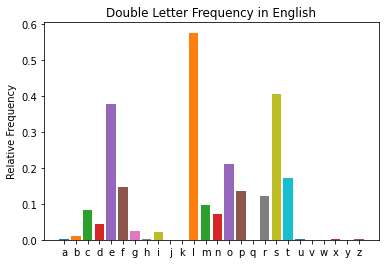

In [256]:
doubleLetterFrequencies_English = {'a':0.003, 'b':0.011, 'c':0.083, 'd':0.043, 'e':0.378, 'f':0.146, 
                                   'g':0.025, 'h':0.001, 'i':0.023, 'j':0.000, 'k':0.000, 'l':0.577,
                                   'm':0.096, 'n':0.073, 'o':0.210, 'p':0.137, 'q':0.000, 'r':0.121, 
                                   's':0.405, 't':0.171, 'u':0.001, 'v':0.000, 'w':0.000, 'x':0.003, 
                                   'y':0.000, 'z':0.003}

for i,key in enumerate(doubleLetterFrequencies_English):
    bar = plt.bar(i,doubleLetterFrequencies_English[key])
    
xticks = plt.xticks(np.arange(len(doubleLetterFrequencies_English.keys())),doubleLetterFrequencies_English.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Double Letter Frequency in English')

The above percentages are the frequencies of each letter appearing as double letters out of a sample of only double letters. 

##### Double Letter Frequencies in the Cipher Text

Now we must find the frequency of each double character in the cipher text.  For this we will not consider the case of the character 

In [11]:
def doubleLetterFrequencies(sampleText, plainAlphabet):
    DoubleLetterFrequencies_sampleText = {k:0 for k in plainAlphabet}

    totalNumDoubleLetters = 0
    for i in range(len(sampleText)-1):
        thisCharacter = sampleText[i]
        nextCharacter = sampleText[i+1]

        if thisCharacter.isalpha() and nextCharacter.isalpha():
            if  thisCharacter.lower() == nextCharacter.lower():
                totalNumDoubleLetters = totalNumDoubleLetters + 1
                
                DoubleLetterFrequencies_sampleText[thisCharacter.lower()] = DoubleLetterFrequencies_sampleText[thisCharacter.lower()] +1

    if totalNumDoubleLetters != 0:
        for doubleLetter in DoubleLetterFrequencies_sampleText.keys():
            DoubleLetterFrequencies_sampleText[doubleLetter] =  DoubleLetterFrequencies_sampleText[doubleLetter] / totalNumDoubleLetters
    
    return DoubleLetterFrequencies_sampleText

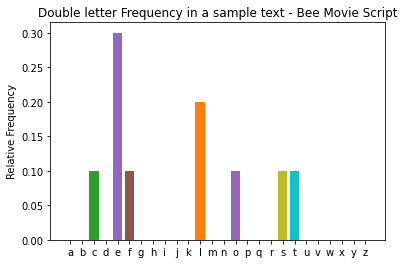

In [298]:
sampleText = "According to all known laws of aviation there is no way a bee should be able to fly Its wings are too small to get its fat little body off the ground The bee of course flies anyway because bees dont care what humans think is impossible"

doubleLetterFrequencies_sampleText = doubleLetterFrequencies(sampleText, plainAlphabet)

for i,key in enumerate(doubleLetterFrequencies_sampleText):
    bar = plt.bar(i,doubleLetterFrequencies_sampleText[key])

xticks = plt.xticks(np.arange(len(doubleLetterFrequencies_sampleText.keys())), doubleLetterFrequencies_sampleText.keys())
ylabel = plt.ylabel('Relative Frequency')
title = plt.title('Double letter Frequency in a sample text - Bee Movie Script')

##### Putting it all together

We need to match the double letter frequency in the ciper text to the known double letter frequency in english

For each possible shift, we are going to shift the cipher text then compare the double letter frequency to the known double letter frequency of english (this will become the 'score' of the given shift)

In [12]:
def breakCeasersCipher_doubleLetterFrequecies( incryptedText, plainAlphabet, doubleLetterFrequencies_plainText ):
    
    possibleShifts = [ i for i in range(1,len(plainAlphabet))] + [ -i for i in range(1,len(plainAlphabet))]

    highestScore = 0
    decryptedText = ''
    incryptedShift = 0
    
    for shift in possibleShifts:
        score = 0
        
        # Test a possible decryption
        decryptedText_test = Decrypt_CeaserShiftCipher(incryptedText, plainAlphabet, shift)
        
        # Find Double Letter Frequency
        doubleLetterFrequencies_cipherText = doubleLetterFrequencies(decryptedText_test, plainAlphabet)

        # Calculate Score
        for character in plainAlphabet:
            score = score + doubleLetterFrequencies_cipherText[character]*(doubleLetterFrequencies_plainText[character]*100)
        
        # Update Solution
        if score > highestScore:
            highestScore = score
            decryptedText = decryptedText_test
            incryptedShift = shift
        
    return incryptedShift, decryptedText

In [333]:
sampleText = "According to all known laws of aviation there is no way a bee should be able to fly Its wings are too small to get its fat little body off the ground The bee of course flies anyway because bees dont care what humans think is impossible"
sampleText_incrypted = Incrypt_CeaserShiftCipher(sampleText,plainAlphabet,4)

proposedShift, proposedText = breakCeasersCipher_doubleLetterFrequecies(sampleText_incrypted, plainAlphabet, doubleLetterFrequencies_English )
print('It is likley the text was incrypted with a shift of {}. The likley original text is as follows:\n\n \"{}\"'.format(proposedShift,proposedText))

It is likley the text was incrypted with a shift of 4. The likley original text is as follows:

 "According to all known laws of aviation there is no way a bee should be able to fly Its wings are too small to get its fat little body off the ground The bee of course flies anyway because bees dont care what humans think is impossible"


# Tests - Breaking Ceaser Shift Ciphers 


The following texts have been encrypted using a Ceaser Cipher 
(ie each letter in the english alphabet has been replaced by a letter a fixed number of shifts down)

Taken from: https://simonsingh.net/cryptography/cryptograms/

In [330]:
cipherText_1 = "BZDRZQ’R VHED LTRS AD ZANUD RTROHBHNM"
print(breakCeasersCipher_singleLetterFrequecies(cipherText_1, plainAlphabet, letterFrequencies_English ))
print(breakCeasersCipher_doubleLetterFrequecies(cipherText_1, plainAlphabet, doubleLetterFrequencies_English ))

(1, 'CAESAR’S WIFE MUST BE ABOVE SUSPICION')
(0, '')


In [337]:
cipherText_2 = "LWW RLFW TD OTGTOPO TYEZ ESCPP ALCED ZYP ZQ HSTNS ESP MPWRLP TYSLMTE ESP LBFTELYT LYZESPC ESZDP HSZ TY ESPTC ZHY WLYRFLRP LCP NLWWPO NPWED TY ZFC RLFWD ESP ESTCO LWW ESPDP OTQQPC QCZX PLNS ZESPC TY WLYRFLRP NFDEZXD LYO WLHD"
print(breakCeasersCipher_singleLetterFrequecies(cipherText_2, plainAlphabet, letterFrequencies_English ))
print(breakCeasersCipher_doubleLetterFrequecies(cipherText_2, plainAlphabet, doubleLetterFrequencies_English ))

(15, 'ALL GAUL IS DIVIDED INTO THREE PARTS ONE OF WHICH THE BELGAE INHABIT THE AQUITANI ANOTHER THOSE WHO IN THEIR OWN LANGUAGE ARE CALLED CELTS IN OUR GAULS THE THIRD ALL THESE DIFFER FROM EACH OTHER IN LANGUAGE CUSTOMS AND LAWS')
(15, 'ALL GAUL IS DIVIDED INTO THREE PARTS ONE OF WHICH THE BELGAE INHABIT THE AQUITANI ANOTHER THOSE WHO IN THEIR OWN LANGUAGE ARE CALLED CELTS IN OUR GAULS THE THIRD ALL THESE DIFFER FROM EACH OTHER IN LANGUAGE CUSTOMS AND LAWS')


In [338]:
cipherText_3 = "KENKMOC PYBDEXK TEFKD"
breakCeasersCipher(cipherText_3, plainAlphabet, letterFrequencies_English )

print(breakCeasersCipher_singleLetterFrequecies(cipherText_3, plainAlphabet, letterFrequencies_English ))
print(breakCeasersCipher_doubleLetterFrequecies(cipherText_3, plainAlphabet, doubleLetterFrequencies_English ))

(16, 'AUDACES FORTUNA JUVAT')
(0, '')


In [340]:
cipherText_4 = "MHILYLZAZBHLXBPZXBLMVYABUHLHWWPBZJSHBKPBZJHLJBZKPJABTHYJHUBTLZAULBAYVU"
print(breakCeasersCipher_singleLetterFrequecies(cipherText_4, plainAlphabet, letterFrequencies_English ))

(19, 'FABERESTSUAEQUISQUEFORTUNAEAPPIUSCLAUDIUSCAECUSDICTUMARCANUMESTNEUTRON')


Before you think that the method failed, ciperTexts 3 and 4 are in Latin ....
Apparenlty latin and english have similar letter frequencies

- CipherText_3: AUDACES FORTUNA JUVAT   
    English Translation: "Fortune favours the bold"
    
      

- CipherText_4: FABERESTSUAEQUISQUEFORTUNAEAPPIUSCLAUDIUSCAECUSDICTUMARCANUMESTNEUTRON   
    With spaces: faber est suae quisque fortunae appius claudius caecus dictum arcanum est oeutron.   
    English Translation: "Each man is the architect of his own fortune. Appius Claudius the Blind said: the secret word is neutron"  
    (thank you https://www.cucumis.org/translation_1_t/view-the-translation_v_91568.html )

In [14]:
cipherText = open('TheCipherTexts_CipherChallenge/Stage1.txt').read()
print(breakCeasersCipher_singleLetterFrequecies(cipherText, plainAlphabet, letterFrequencies_English ))

(17, 'SK AGO IDCO GTLM RDCO ZTMAG ZSKNOMI TZ D CDK’I GDKE, DKE PMTAO TUOM DNDSKIA AGO RDKEXOIASRY LHTK AGO HXDIAOM TZ AGO PDXX TZ AGO YSKN’I HDXDRO; DKE AGO YSKN IDP AGO HDMA TZ AGO GDKE AGDA PMTAO. AGOK AGO YSKN’I RTLKAOKDKRO PDI RGDKNOE, DKE GSI AGTLNGAI AMTLWXOE GSC, IT AGDA AGO JTSKAI TZ GSI XTSKI POMO XTTIOE, DKE GSI YKOOI ICTAO TKO DNDSKIA DKTAGOM. AGO YSKN RMSOE DXTLE AT WMSKN SK AGO DIAMTXTNOMI, AGO RGDXEODKI, DKE AGO ITTAGIDVOMI. DKE AGO YSKN IHDYO, DKE IDSE AT AGO PSIO COK TZ WDWVXTK, PGTITOUOM IGDXX MODE AGSI PMSASKN, DKE IGTP CO AGO SKAOMHMOADASTK AGOMOTZ, IGDXX WO RXTAGOE PSAG IRD')
